In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import seaborn

In [2]:
with h5py.File('sample-1.h5', 'r') as file:
    features = file['x'][:]
    labels = file['y'][:]

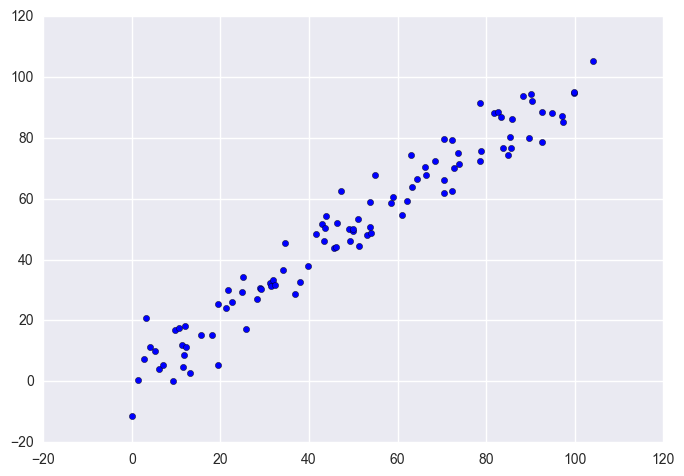

In [3]:
plt.scatter(features, labels)
plt.show()

### Tworzenie grafu w `tensorflow` dla liniowej regresji

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])

w = tf.Variable(tf.truncated_normal(shape=[1, 1]))
b = tf.Variable(tf.zeros(shape=[1]))

y_ = tf.matmul(x, w) + b

loss = tf.reduce_mean(tf.square(y - y_))

train_step = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

### Trenowanie modelu

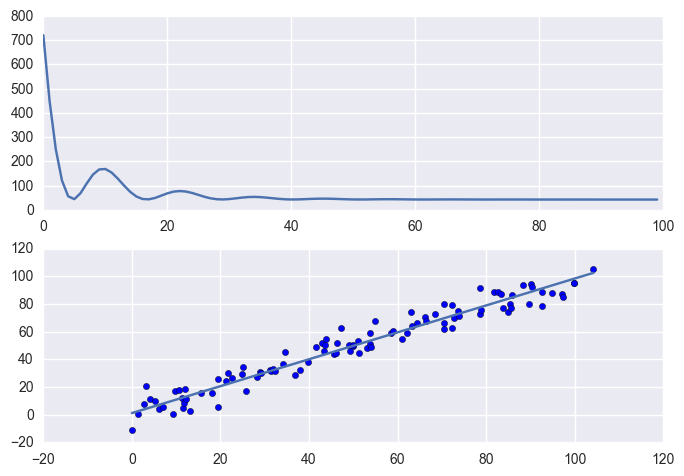

In [5]:
losses = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for it in range(100):
        l, _ = sess.run([loss, train_step], feed_dict={x: features[:, None],
                                                       y: labels[:, None]})
        losses += [l]
    
    plt.subplot(2, 1, 1)
    plt.plot(losses)
    
    pred = sess.run(y_, feed_dict={x: features[:, None]})
    
    plt.subplot(2, 1, 2)
    plt.scatter(features, labels)
    plt.plot(features, pred)
    
    plt.show()